In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# 데이터 다운로드

In [ ]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')

# 유저별 장르 선호 연관관계
- 첫번째로 로맨스를 선호하는 사람이 두번째로 액션을 좋아하는 것과 같이 유저가 선호하는 장르 간 상관관계가 존재할까? 
- 유저가 첫번째로 선호하는 장르와 두번째로 선호하는 장르의 연관관계를 분석해보자

In [ ]:
genre_df= pd.merge(train_df, genre_data, on='item', how='left')
genre_df

,user,item,time,genre
0,63312,1,1113223287,Adventure
1,63312,1,1113223287,Animation
2,63312,1,1113223287,Children
3,63312,1,1113223287,Comedy
4,63312,1,1113223287,Fantasy
...,...,...,...,...
14126319,66649,119145,1427494822,Crime
14126320,116204,119145,1427745501,Action
14126321,116204,119145,1427745501,Adventure
14126322,116204,119145,1427745501,Comedy


In [ ]:
temp=pd.DataFrame(genre_df.groupby(['user','genre'])['item'].count())
temp.reset_index(inplace=True)
temp.sort_values(['user','item'],ascending=False, inplace=True)

In [ ]:
temp2= temp[temp.index %2 !=0]['genre']
temp2.reset_index(drop=True, inplace=True)
temp2= temp.drop_duplicates('user', keep='first')
temp2

,user,genre,item
521204,138493,Drama,139
521185,138492,Comedy,42
521178,138486,Thriller,60
521154,138475,Drama,76
521136,138473,Drama,37
...,...,...,...
68,31,Adventure,94
57,25,Drama,41
40,18,Drama,62
22,14,Comedy,106


In [ ]:
temp2.genre.unique()

array(['Drama', 'Comedy', 'Thriller', 'Adventure', 'Action', 'Sci-Fi',
       'Horror', 'Children', 'Romance', 'Crime', 'Fantasy', 'Animation',
       'Musical', 'War', 'Film-Noir'], dtype=object)

- 유저들이 가장 많이 평점 매기는 영화장르의 순서는 위 순서와 같다

In [ ]:
temp2= pd.merge(temp2, temp, on='user', how='left')
temp2.drop('item_x', axis=1, inplace=True)

# 가장 선호하는 장르와 그외 다른 장르들을 그루핑한다. 
temp2= pd.DataFrame(temp2.groupby(['genre_x','genre_y'])['item_y'].sum())
temp2.reset_index(inplace=True)

In [ ]:
temp2

,genre_x,genre_y,item_y
0,Action,Action,354551
1,Action,Adventure,245103
2,Action,Animation,54893
3,Action,Children,55507
4,Action,Comedy,211926
...,...,...,...
258,War,Musical,1
259,War,Romance,8
260,War,Sci-Fi,4
261,War,Thriller,6


In [ ]:
temp_pivot= temp2.pivot_table('item_y','genre_x','genre_y',margins=True)
# 각 행 별(가장 선호하는 장르 별) 비율로 값 수정
for i in range(len(temp_pivot)):
    temp_pivot.iloc[i]= temp_pivot.iloc[i] / temp_pivot.iloc[i,-1]

temp_pivot.drop(['All'], axis=1, inplace=True)
temp_pivot.fillna(0, inplace=True)

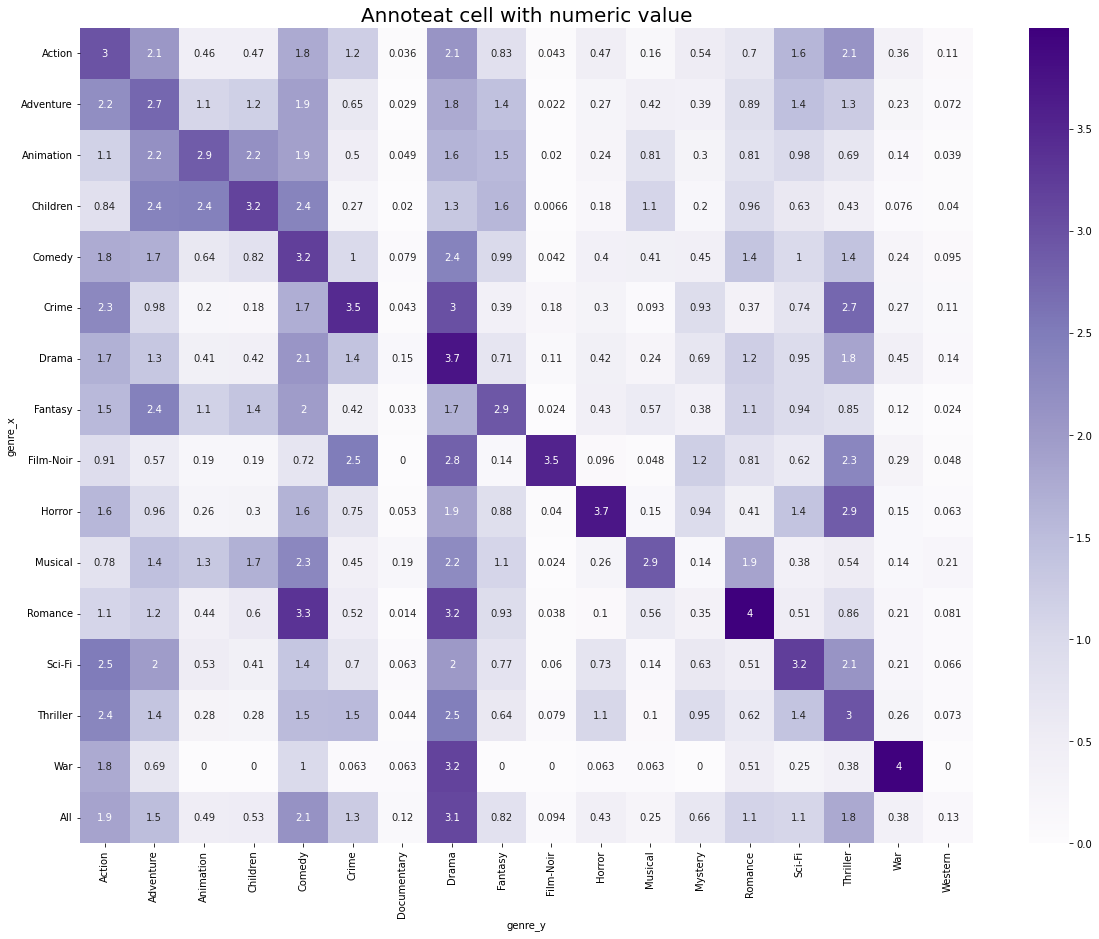

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(temp_pivot, annot=True, cmap='Purples')

plt.title('Annoteat cell with numeric value', fontsize=20)

plt.show()


가장 눈에 띄는 관계는 드라마 계열을 제외하고 로맨스코미디, 호러스릴러, 범죄스릴러이다.

대체적으로 action을 선호하는 사람들은 adventure를 선호하는 경향이 있다.(반대도 성립)
animation, childre을 선호하는 사람들은 adventure 영화를 선호한다.
crime과 thriller, film noir도 어느정도 연관이 있다. 
horror를 좋아하는 사람들은 확실히 스릴러 좋아함

- Action을 가장 선호하는 사람: Adventure = Drama = Thriller > Scifi > comedy
- Adventure를 가장 선호하는 사람: Action > Comedy > Drama > Fandasy = Scifi
- Animation를 가장 선호하는 사람: Adventure = children > comedy > drama > Fantasy
- Children를 가장 선호하는 사람: adventure = animation = comedy > fantasy > drama
- comedy를 가장 선호하는 사람: drama > action > adventure > crime > fantasy
- crime을 가장 선호하는 사람: drama > thriller > action > comedy > adventure
- thrillerl을 가장 선호하는 사람: drama > action > comedy = crime
- drama을 가장 선호하는 사람: comedy > thriller > action > crime > adventure 
- fantasy을 가장 선호하는 사람: adventure > comedy > drama > action > children
- film-noir 가장 선호하는 사람: drama > crime > thriller > mystery > action
- horror을 가장 선호하는 사람: thriller > drama > action = comedy > scifi
- musical을 가장 선호하는 사람: comedy > drama > romance
- romance을 가장 선호하는 사람:comedy > drama > adventure
- scifi을 가장 선호하는 사람: action > thriller > drama
- war을 가장 선호하는 사람: drama > action > comedy